In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

**Using Augmentation techniques**

In [44]:
mnist = tf.keras.datasets.mnist #Get the data

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [3]:
image_size = x_train.shape[1]
input_size = image_size * image_size
batch_size = 128
hidden_units = 256
epochs = 20
max_batches = len(x_train) / batch_size

In [4]:
from keras.preprocessing.image import ImageDataGenerator

BEFORE:



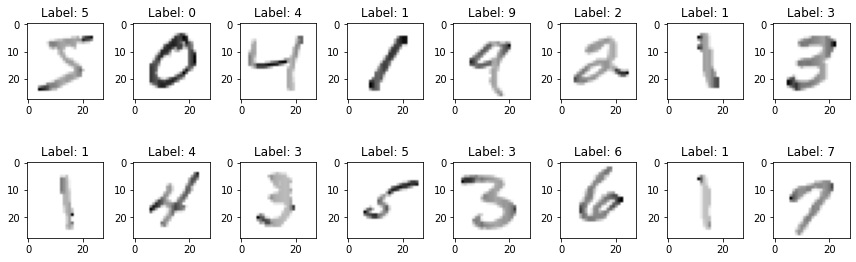

AFTER:



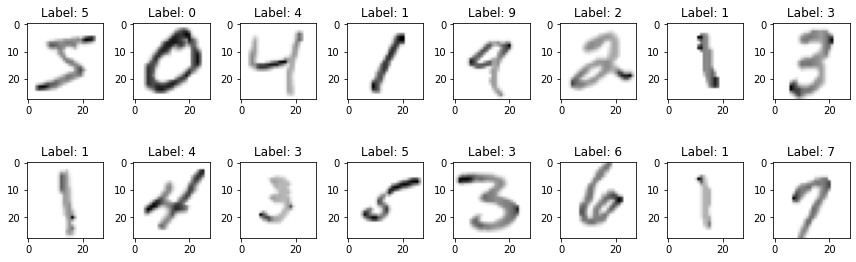

In [49]:
datagen = ImageDataGenerator(zoom_range = 0.2,)
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1),y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [50]:
#Create Neural Network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(X,Y,epochs=500) 

Epoch 1/500
1/1 [==============================] - 0s 499ms/step - loss: 2.3076 - accuracy: 0.1875
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 2.1660 - accuracy: 0.3125
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 2.0425 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - loss: 1.9245 - accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 1.8116 - accuracy: 0.8750
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 1.6999 - accuracy: 0.8750
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 1.5862 - accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 1.4708 - accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 1.3545 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 17ms/step - loss: 1.2358 - accuracy: 1.0000
Epoch 11/500
1/1 [

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [54]:
x_test = np.reshape(x_test, [-1, input_size])
scores = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=False)
print('Test loss:', scores[0])
print('Test accuracy: %0.1f%%' % (100 * scores[1]) )

Test loss: 2.3915226459503174
Test accuracy: 50.7%


In [41]:
#Show the loss and accuracy.
x_test = np.reshape(x_test, [-1, input_size])
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

model.save('epic_num_reader_augmentation.model.h5')

313/313 [==============================] - 1s 4ms/step - loss: 2.3261 - accuracy: 0.5476
2.3260555267333984 0.5475999712944031


In [45]:
new_model = tf.keras.models.load_model('/content/epic_num_reader_augmentation.model.h5')
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


The number is :  1


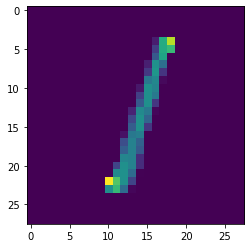

In [46]:
print("The number is : ",np.argmax(predictions[2])) 

#Show the image
plt.imshow(x_test[2]) 
plt.show()

**Optimizing neural networks using L2 regularization, Dropout and early stopping.**

In [24]:
mnist = tf.keras.datasets.mnist #Get the data

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [28]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Dropout

In [29]:
model2=Sequential([
    Flatten(),
    Dense(128,activation='relu',activity_regularizer=tensorflow.keras.regularizers.L2(0.01)),
    Dropout(0.5),
    Dense(54,activation='relu',activity_regularizer=tensorflow.keras.regularizers.L2(0.01)),
    Dropout(0.5),
    Dense(10,activation='softmax',activity_regularizer=tensorflow.keras.regularizers.L2(0.01))
])

In [30]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [ ]:
model2.fit(x_train,y_train,epochs=50,callbacks=[callback])

In [ ]:
#Show the loss and accuracy.
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

model.save('epic_num_reader_usingalltech.model.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9686
0.16433602571487427 0.9685999751091003


In [ ]:
new_model = tf.keras.models.load_model('/content/epic_num_reader_usingalltech.model.h5')
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


The number is :  6


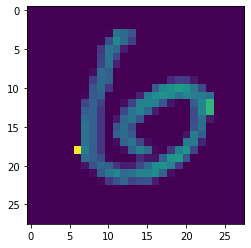

In [ ]:
#Convert to understandable form.
print("The number is : ",np.argmax(predictions[11])) 
#If you want change the test and prediction numbers

#Show the image
plt.imshow(x_test[11]) 
plt.show()